<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/stratifiedkfoldcslongia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Données déséquilibrées

In [2]:
Cl = '/content/cs_longia_dés.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
256,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
257,-5.366667,35

In [4]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
256,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
257,-

In [6]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Name: Cs_longia, Length: 260, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

# Modèle Complet

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

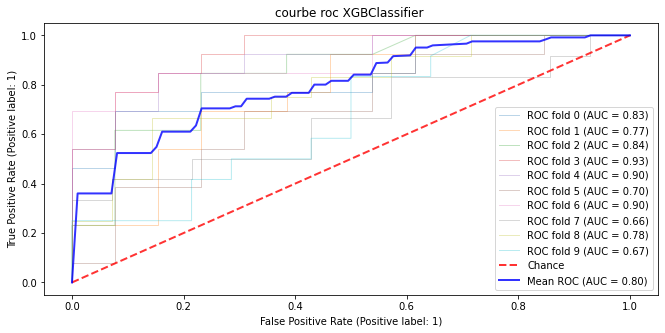

Accuracy: [0.76923077 0.69230769 0.73076923 0.80769231 0.76923077 0.61538462
 0.84615385 0.57692308 0.69230769 0.61538462]
moy_accuracy: 0.71
precision: [0.76923077 0.69230769 0.75       0.83333333 0.73333333 0.63636364
 0.90909091 0.54545455 0.64285714 0.6       ]
moy_precision: 0.71
sensibilité : [0.76923077 0.69230769 0.69230769 0.76923077 0.84615385 0.53846154
 0.76923077 0.5        0.75       0.5       ]
moy_sensibilité: 0.68
spécificité : [0.76923077 0.69230769 0.76923077 0.84615385 0.69230769 0.69230769
 0.92307692 0.64285714 0.64285714 0.71428571]
moy_spécificité: 0.74
MCC : [0.53846154 0.38461538 0.46291005 0.6172134  0.54494926 0.23354968
 0.70064905 0.14414999 0.39285714 0.21957752]
MCC: 0.42
balanced_accuracy : [0.76923077 0.69230769 0.73076923 0.80769231 0.76923077 0.61538462
 0.84615385 0.57142857 0.69642857 0.60714286]
balanced_accuracy: 0.71
roc_auc : [0.82840237 0.76923077 0.84319527 0.92899408 0.89940828 0.69822485
 0.89940828 0.66071429 0.7797619  0.66964286]
roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

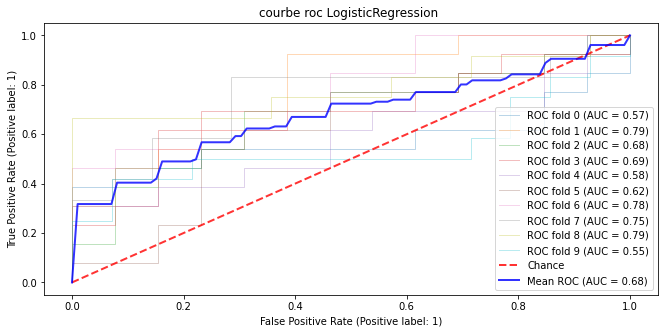

Accuracy: [0.65384615 0.69230769 0.61538462 0.69230769 0.53846154 0.61538462
 0.61538462 0.69230769 0.61538462 0.61538462]
moy_accuracy: 0.63
precision: [0.7        0.66666667 0.63636364 0.72727273 0.53333333 0.66666667
 0.6        0.7        0.55555556 0.6       ]
moy_precision: 0.64
sensibilité : [0.53846154 0.76923077 0.53846154 0.61538462 0.61538462 0.46153846
 0.69230769 0.58333333 0.83333333 0.5       ]
moy_sensibilité: 0.61
spécificité : [0.76923077 0.61538462 0.69230769 0.76923077 0.46153846 0.76923077
 0.53846154 0.78571429 0.42857143 0.71428571]
moy_spécificité: 0.65
MCC : [0.31622777 0.38924947 0.23354968 0.38924947 0.07784989 0.24253563
 0.23354968 0.37816128 0.28288947 0.21957752]
MCC: 0.28
balanced_accuracy : [0.65384615 0.69230769 0.61538462 0.69230769 0.53846154 0.61538462
 0.61538462 0.68452381 0.63095238 0.60714286]
balanced_accuracy: 0.63
roc_auc : [0.58579882 0.79289941 0.68047337 0.69822485 0.58579882 0.62130178
 0.77514793 0.73809524 0.74404762 0.54761905]
roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

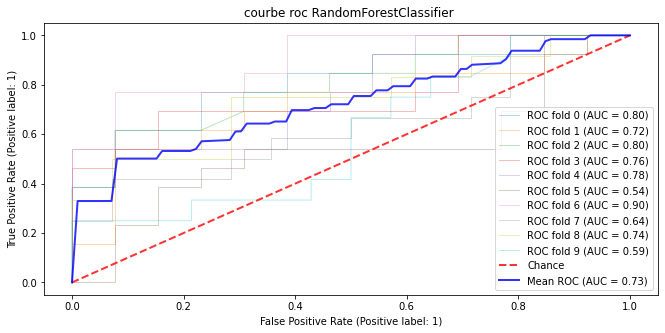

Accuracy: [0.69230769 0.69230769 0.69230769 0.73076923 0.61538462 0.57692308
 0.80769231 0.61538462 0.65384615 0.53846154]
moy_accuracy: 0.66
precision: [0.72727273 0.72727273 0.69230769 0.8        0.6        0.58333333
 0.9        0.58333333 0.63636364 0.5       ]
moy_precision: 0.67
sensibilité : [0.61538462 0.61538462 0.69230769 0.61538462 0.69230769 0.53846154
 0.69230769 0.58333333 0.58333333 0.25      ]
moy_sensibilité: 0.59
spécificité : [0.76923077 0.76923077 0.69230769 0.84615385 0.53846154 0.61538462
 0.92307692 0.64285714 0.71428571 0.78571429]
moy_spécificité: 0.73
MCC : [0.38924947 0.38924947 0.38461538 0.47434165 0.23354968 0.15430335
 0.63245553 0.22619048 0.30031249 0.04225771]
MCC: 0.32
balanced_accuracy : [0.69230769 0.69230769 0.69230769 0.73076923 0.61538462 0.57692308
 0.80769231 0.61309524 0.64880952 0.51785714]
balanced_accuracy: 0.66
roc_auc : [0.80473373 0.71597633 0.80177515 0.76331361 0.77514793 0.53846154
 0.89940828 0.63690476 0.73809524 0.5922619 ]
roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

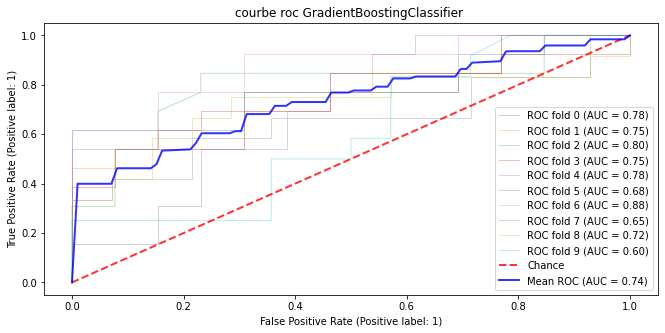

Accuracy: [0.73076923 0.61538462 0.80769231 0.69230769 0.65384615 0.73076923
 0.80769231 0.65384615 0.69230769 0.46153846]
moy_accuracy: 0.68
precision: [0.8        0.6        0.78571429 0.69230769 0.625      0.71428571
 1.         0.63636364 0.64285714 0.375     ]
moy_precision: 0.69
sensibilité : [0.61538462 0.69230769 0.84615385 0.69230769 0.76923077 0.76923077
 0.61538462 0.58333333 0.75       0.25      ]
moy_sensibilité: 0.66
spécificité : [0.84615385 0.53846154 0.76923077 0.69230769 0.53846154 0.69230769
 1.         0.71428571 0.64285714 0.64285714]
moy_spécificité: 0.71
MCC : [ 0.47434165  0.23354968  0.6172134   0.38461538  0.31622777  0.46291005
  0.66666667  0.30031249  0.39285714 -0.11572751]
MCC: 0.37
balanced_accuracy : [0.73076923 0.61538462 0.80769231 0.69230769 0.65384615 0.73076923
 0.80769231 0.64880952 0.69642857 0.44642857]
balanced_accuracy: 0.68
roc_auc : [0.78106509 0.75147929 0.79585799 0.75147929 0.78106509 0.68047337
 0.87573964 0.6547619  0.7202381  0.6041666

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

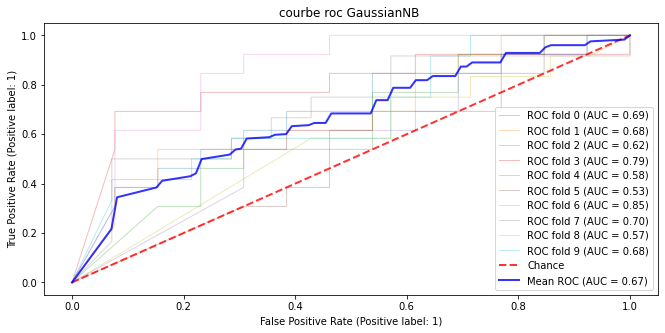

Accuracy: [0.61538462 0.57692308 0.5        0.65384615 0.53846154 0.5
 0.76923077 0.65384615 0.46153846 0.57692308]
moy_accuracy: 0.58
precision: [0.63636364 0.5625     0.5        0.625      0.53333333 0.5
 0.76923077 0.63636364 0.45454545 0.52941176]
moy_precision: 0.57
sensibilité : [0.53846154 0.69230769 0.53846154 0.76923077 0.61538462 0.76923077
 0.76923077 0.58333333 0.83333333 0.75      ]
moy_sensibilité: 0.69
spécificité : [0.69230769 0.46153846 0.46153846 0.53846154 0.46153846 0.23076923
 0.76923077 0.71428571 0.14285714 0.42857143]
moy_spécificité: 0.49
MCC : [ 0.23354968  0.15811388  0.          0.31622777  0.07784989  0.
  0.53846154  0.30031249 -0.03289758  0.1871203 ]
MCC: 0.18
balanced_accuracy : [0.61538462 0.57692308 0.5        0.65384615 0.53846154 0.5
 0.76923077 0.64880952 0.48809524 0.58928571]
balanced_accuracy: 0.59
roc_auc : [0.68639053 0.67751479 0.62130178 0.78994083 0.57988166 0.52662722
 0.85207101 0.70238095 0.56845238 0.67857143]
roc_auc: 0.67
cohen_kappa_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

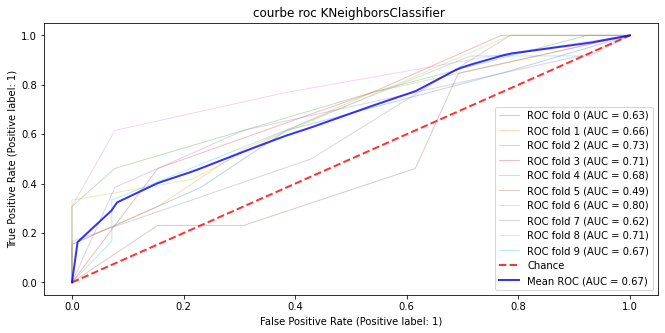

Accuracy: [0.57692308 0.57692308 0.69230769 0.65384615 0.65384615 0.46153846
 0.76923077 0.57692308 0.61538462 0.61538462]
moy_accuracy: 0.62
precision: [0.625      0.66666667 0.85714286 0.75       0.66666667 0.42857143
 0.88888889 0.57142857 0.625      0.75      ]
moy_precision: 0.68
sensibilité : [0.38461538 0.30769231 0.46153846 0.46153846 0.61538462 0.23076923
 0.61538462 0.33333333 0.41666667 0.25      ]
moy_sensibilité: 0.41
spécificité : [0.76923077 0.84615385 0.92307692 0.84615385 0.69230769 0.69230769
 0.92307692 0.78571429 0.78571429 0.92857143]
moy_spécificité: 0.82
MCC : [ 0.16666667  0.18257419  0.43355498  0.33333333  0.3086067  -0.086711
  0.56591646  0.13379797  0.21859641  0.24673189]
MCC: 0.25
balanced_accuracy : [0.57692308 0.57692308 0.69230769 0.65384615 0.65384615 0.46153846
 0.76923077 0.55952381 0.60119048 0.58928571]
balanced_accuracy: 0.61
roc_auc : [0.63313609 0.65976331 0.73076923 0.70710059 0.67751479 0.49408284
 0.79585799 0.625      0.70535714 0.64583333]

In [8]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv =StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

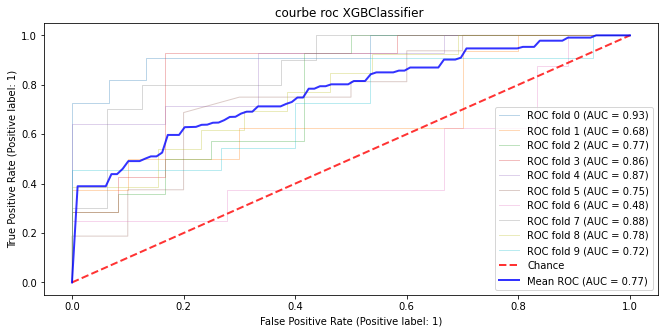

Accuracy: [0.84615385 0.61538462 0.61538462 0.84615385 0.76923077 0.73076923
 0.42307692 0.76923077 0.69230769 0.57692308]
moy_accuracy: 0.69
precision: [0.81818182 0.75       0.64285714 0.85714286 0.9        0.84615385
 0.29411765 0.66666667 0.69230769 0.5       ]
moy_precision: 0.70
sensibilité : [0.81818182 0.5625     0.64285714 0.85714286 0.64285714 0.6875
 0.625      0.8        0.69230769 0.54545455]
moy_sensibilité: 0.69
spécificité : [0.86666667 0.7        0.58333333 0.83333333 0.91666667 0.8
 0.33333333 0.75       0.69230769 0.6       ]
moy_spécificité: 0.71
MCC : [ 0.68484848  0.25617377  0.22619048  0.69047619  0.57334129  0.47434165
 -0.0404226   0.53674504  0.38461538  0.14414999]
MCC: 0.39
balanced_accuracy : [0.84242424 0.63125    0.61309524 0.8452381  0.7797619  0.74375
 0.47916667 0.775      0.69230769 0.57272727]
balanced_accuracy: 0.70
roc_auc : [0.93333333 0.68125    0.76785714 0.86309524 0.86904762 0.753125
 0.47916667 0.88125    0.77514793 0.72121212]
roc_auc: 0.77

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

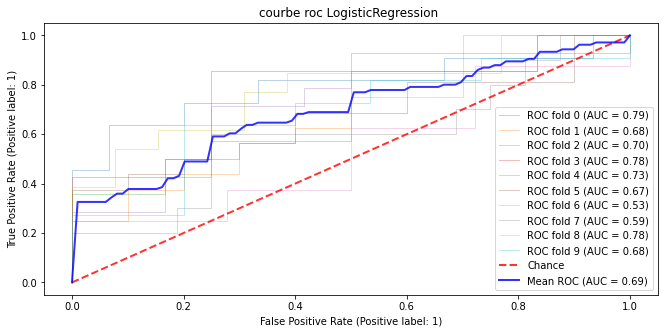

Accuracy: [0.73076923 0.61538462 0.53846154 0.80769231 0.73076923 0.57692308
 0.61538462 0.65384615 0.69230769 0.65384615]
moy_accuracy: 0.66
precision: [0.64285714 0.75       0.57142857 0.8        0.76923077 0.69230769
 0.375      0.54545455 0.69230769 0.625     ]
moy_precision: 0.65
sensibilité : [0.81818182 0.5625     0.57142857 0.85714286 0.71428571 0.5625
 0.375      0.6        0.69230769 0.45454545]
moy_sensibilité: 0.62
spécificité : [0.66666667 0.7        0.5        0.75       0.75       0.6
 0.72222222 0.6875     0.69230769 0.8       ]
moy_spécificité: 0.69
MCC : [0.48049998 0.25617377 0.07142857 0.61263747 0.46291005 0.15811388
 0.09722222 0.28311043 0.38461538 0.27247463]
MCC: 0.31
balanced_accuracy : [0.74242424 0.63125    0.53571429 0.80357143 0.73214286 0.58125
 0.54861111 0.64375    0.69230769 0.62727273]
balanced_accuracy: 0.65
roc_auc : [0.83636364 0.66875    0.70238095 0.7797619  0.70833333 0.66875
 0.53472222 0.59375    0.78106509 0.68484848]
roc_auc: 0.70
cohen_kapp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

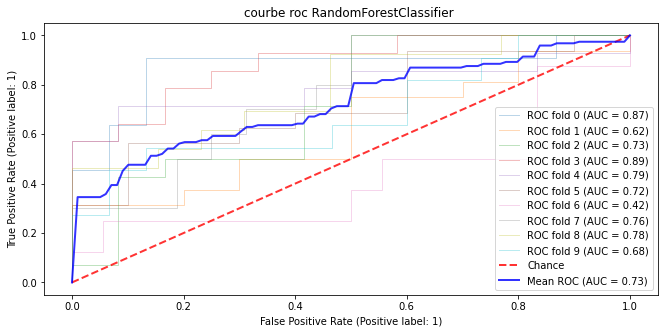

Accuracy: [0.80769231 0.53846154 0.57692308 0.80769231 0.76923077 0.61538462
 0.46153846 0.65384615 0.65384615 0.69230769]
moy_accuracy: 0.66
precision: [0.71428571 0.7        0.63636364 0.8        0.9        0.75
 0.28571429 0.57142857 0.66666667 0.66666667]
moy_precision: 0.67
sensibilité : [0.90909091 0.4375     0.5        0.85714286 0.64285714 0.5625
 0.5        0.4        0.61538462 0.54545455]
moy_sensibilité: 0.60
spécificité : [0.73333333 0.7        0.66666667 0.75       0.91666667 0.7
 0.44444444 0.8125     0.69230769 0.8       ]
moy_spécificité: 0.72
MCC : [ 0.63666247  0.1375      0.16817499  0.61263747  0.57334129  0.25617377
 -0.05143445  0.23307361  0.3086067   0.35874608]
MCC: 0.32
balanced_accuracy : [0.82121212 0.56875    0.58333333 0.80357143 0.7797619  0.63125
 0.47222222 0.60625    0.65384615 0.67272727]
balanced_accuracy: 0.66
roc_auc : [0.87272727 0.61875    0.72619048 0.88690476 0.79166667 0.725
 0.42361111 0.7625     0.78106509 0.68484848]
roc_auc: 0.73
cohen_ka

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

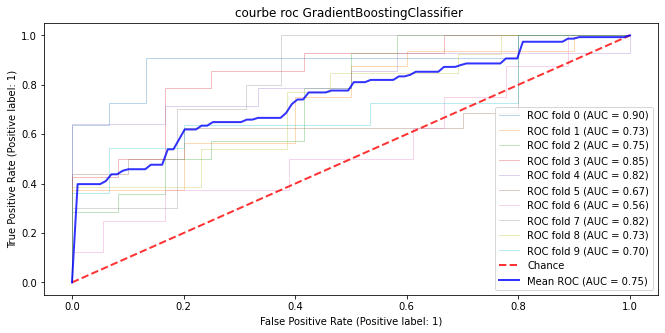

Accuracy: [0.88461538 0.65384615 0.61538462 0.80769231 0.76923077 0.65384615
 0.46153846 0.73076923 0.61538462 0.69230769]
moy_accuracy: 0.69
precision: [0.83333333 0.81818182 0.66666667 0.84615385 0.9        0.76923077
 0.28571429 0.63636364 0.61538462 0.66666667]
moy_precision: 0.70
sensibilité : [0.90909091 0.5625     0.57142857 0.78571429 0.64285714 0.625
 0.5        0.7        0.61538462 0.54545455]
moy_sensibilité: 0.65
spécificité : [0.86666667 0.8        0.66666667 0.83333333 0.91666667 0.7
 0.44444444 0.75       0.61538462 0.8       ]
moy_spécificité: 0.74
MCC : [ 0.76879997  0.35696532  0.23809524  0.6172134   0.57334129  0.31622777
 -0.05143445  0.44312937  0.23076923  0.35874608]
MCC: 0.39
balanced_accuracy : [0.88787879 0.68125    0.61904762 0.80952381 0.7797619  0.6625
 0.47222222 0.725      0.61538462 0.67272727]
balanced_accuracy: 0.69
roc_auc : [0.8969697  0.73125    0.75       0.85119048 0.81547619 0.675
 0.55555556 0.81875    0.72781065 0.7030303 ]
roc_auc: 0.75
cohe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

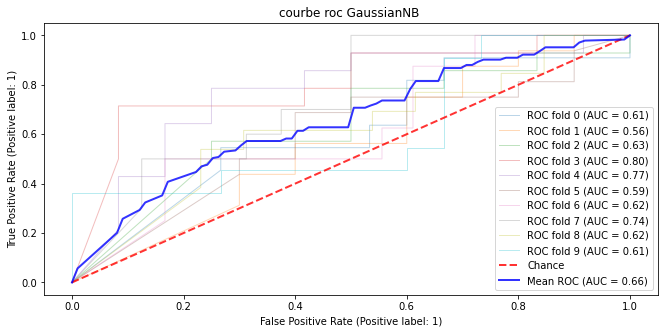

Accuracy: [0.53846154 0.5        0.61538462 0.69230769 0.76923077 0.57692308
 0.46153846 0.61538462 0.57692308 0.5       ]
moy_accuracy: 0.58
precision: [0.47058824 0.6        0.61111111 0.6875     0.78571429 0.61904762
 0.3125     0.5        0.5625     0.41666667]
moy_precision: 0.56
sensibilité : [0.72727273 0.5625     0.78571429 0.78571429 0.78571429 0.8125
 0.625      0.7        0.69230769 0.45454545]
moy_sensibilité: 0.69
spécificité : [0.4        0.4        0.41666667 0.58333333 0.75       0.2
 0.38888889 0.5625     0.46153846 0.53333333]
moy_spécificité: 0.47
MCC : [ 0.13216961 -0.03692745  0.21859641  0.37816128  0.53571429  0.01543033
  0.01317616  0.25617377  0.15811388 -0.0120125 ]
MCC: 0.17
balanced_accuracy : [0.56363636 0.48125    0.60119048 0.68452381 0.76785714 0.50625
 0.50694444 0.63125    0.57692308 0.49393939]
balanced_accuracy: 0.58
roc_auc : [0.60606061 0.559375   0.63392857 0.80059524 0.77083333 0.5875
 0.625      0.7375     0.6183432  0.61212121]
roc_auc: 0.66
c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

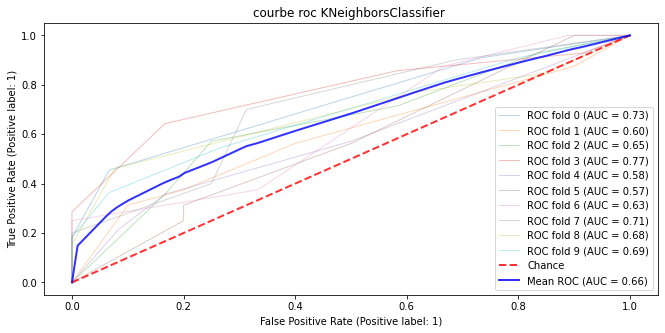

Accuracy: [0.73076923 0.53846154 0.65384615 0.73076923 0.57692308 0.5
 0.57692308 0.61538462 0.69230769 0.69230769]
moy_accuracy: 0.63
precision: [0.83333333 0.75       0.72727273 0.81818182 0.71428571 0.71428571
 0.33333333 0.5        0.85714286 0.8       ]
moy_precision: 0.70
sensibilité : [0.45454545 0.375      0.57142857 0.64285714 0.35714286 0.3125
 0.375      0.4        0.46153846 0.36363636]
moy_sensibilité: 0.43
spécificité : [0.93333333 0.8        0.75       0.83333333 0.83333333 0.8
 0.66666667 0.75       0.92307692 0.93333333]
moy_spécificité: 0.82
MCC : [0.45482819 0.1844662  0.32433749 0.48049998 0.21407676 0.12339191
 0.0404226  0.15811388 0.43355498 0.37227122]
MCC: 0.28
balanced_accuracy : [0.69393939 0.5875     0.66071429 0.73809524 0.5952381  0.55625
 0.52083333 0.575      0.69230769 0.64848485]
balanced_accuracy: 0.63
roc_auc : [0.73030303 0.596875   0.64880952 0.76785714 0.58035714 0.56875
 0.63194444 0.70625    0.68343195 0.68787879]
roc_auc: 0.66
cohen_kappa_score

In [9]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

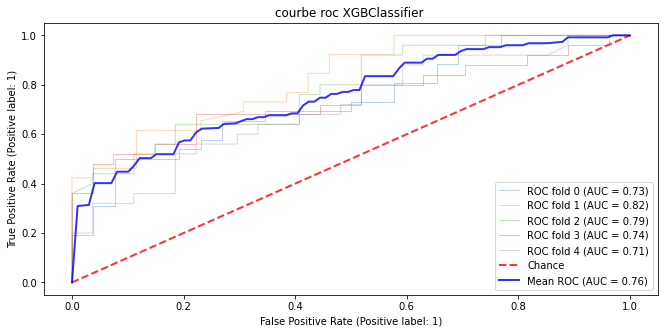

Accuracy: [0.67307692 0.69230769 0.65384615 0.71153846 0.65384615]
moy_accuracy: 0.68
precision: [0.66666667 0.66666667 0.62068966 0.72727273 0.64      ]
moy_precision: 0.66
sensibilité : [0.69230769 0.76923077 0.72       0.64       0.64      ]
moy_sensibilité: 0.69
spécificité : [0.65384615 0.61538462 0.59259259 0.77777778 0.66666667]
moy_spécificité: 0.66
MCC : [0.34641016 0.38924947 0.31446162 0.42249858 0.30666667]
MCC: 0.36
balanced_accuracy : [0.67307692 0.69230769 0.6562963  0.70888889 0.65333333]
balanced_accuracy: 0.68
roc_auc : [0.73372781 0.82248521 0.78592593 0.74074074 0.70740741]
roc_auc: 0.76
cohen_kappa_scorec : [0.34615385 0.38461538 0.3107511  0.41964286 0.30666667]
cohen_kappa_scorec: 0.35
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

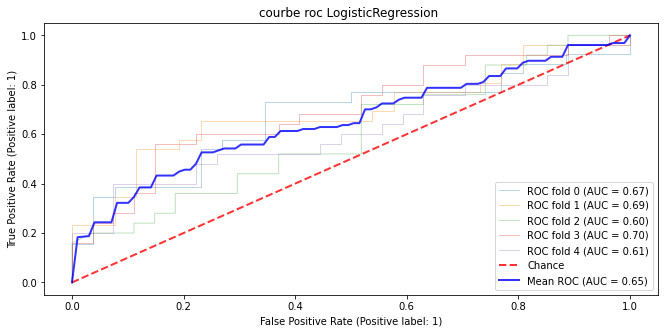

Accuracy: [0.61538462 0.67307692 0.55769231 0.63461538 0.55769231]
moy_accuracy: 0.61
precision: [0.625      0.68       0.54166667 0.61538462 0.53571429]
moy_precision: 0.60
sensibilité : [0.57692308 0.65384615 0.52       0.64       0.6       ]
moy_sensibilité: 0.60
spécificité : [0.65384615 0.69230769 0.59259259 0.62962963 0.51851852]
moy_spécificité: 0.62
MCC : [0.23145502 0.34641016 0.11284364 0.26943013 0.11878277]
MCC: 0.22
balanced_accuracy : [0.61538462 0.67307692 0.5562963  0.63481481 0.55925926]
balanced_accuracy: 0.61
roc_auc : [0.67011834 0.68786982 0.60222222 0.70518519 0.61777778]
roc_auc: 0.66
cohen_kappa_scorec : [0.23076923 0.34615385 0.11275964 0.26923077 0.1179941 ]
cohen_kappa_scorec: 0.22
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

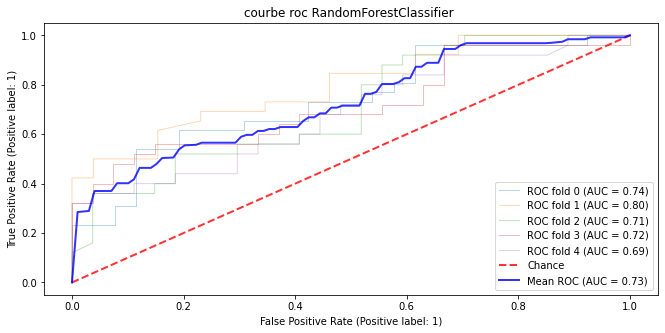

Accuracy: [0.67307692 0.73076923 0.59615385 0.61538462 0.59615385]
moy_accuracy: 0.64
precision: [0.69565217 0.75       0.57692308 0.60869565 0.59090909]
moy_precision: 0.64
sensibilité : [0.61538462 0.69230769 0.6        0.56       0.52      ]
moy_sensibilité: 0.60
spécificité : [0.73076923 0.76923077 0.59259259 0.66666667 0.66666667]
moy_spécificité: 0.69
MCC : [0.34848139 0.46291005 0.19245009 0.22802194 0.18877596]
MCC: 0.28
balanced_accuracy : [0.67307692 0.73076923 0.5962963  0.61333333 0.59333333]
balanced_accuracy: 0.64
roc_auc : [0.7352071  0.79585799 0.70888889 0.71703704 0.68814815]
roc_auc: 0.73
cohen_kappa_scorec : [0.34615385 0.46153846 0.19230769 0.22734027 0.1875    ]
cohen_kappa_scorec: 0.28
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

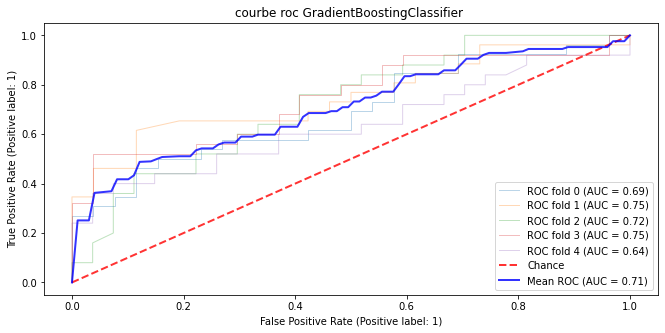

Accuracy: [0.61538462 0.63461538 0.63461538 0.67307692 0.59615385]
moy_accuracy: 0.63
precision: [0.625      0.62068966 0.61538462 0.7        0.59090909]
moy_precision: 0.63
sensibilité : [0.57692308 0.69230769 0.64       0.56       0.52      ]
moy_sensibilité: 0.60
spécificité : [0.65384615 0.57692308 0.62962963 0.77777778 0.66666667]
moy_spécificité: 0.66
MCC : [0.23145502 0.27104108 0.26943013 0.34689095 0.18877596]
MCC: 0.26
balanced_accuracy : [0.61538462 0.63461538 0.63481481 0.66888889 0.59333333]
balanced_accuracy: 0.63
roc_auc : [0.6908284  0.75147929 0.7237037  0.74518519 0.63925926]
roc_auc: 0.71
cohen_kappa_scorec : [0.23076923 0.26923077 0.26923077 0.34029851 0.1875    ]
cohen_kappa_scorec: 0.26
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

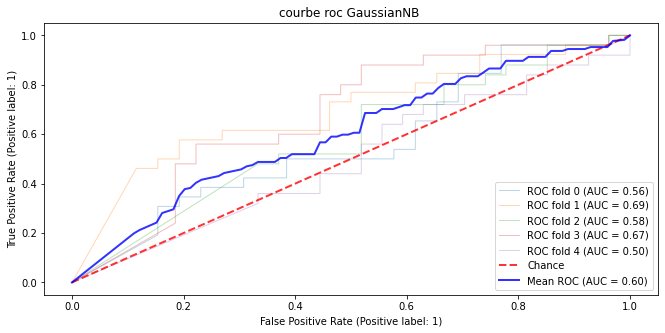

Accuracy: [0.5        0.63461538 0.57692308 0.67307692 0.48076923]
moy_accuracy: 0.57
precision: [0.5        0.61290323 0.54545455 0.7        0.47727273]
moy_precision: 0.57
sensibilité : [0.5        0.73076923 0.72       0.56       0.84      ]
moy_sensibilité: 0.67
spécificité : [0.5        0.53846154 0.44444444 0.77777778 0.14814815]
moy_spécificité: 0.48
MCC : [ 0.          0.27435163  0.1706229   0.34689095 -0.0164122 ]
MCC: 0.16
balanced_accuracy : [0.5        0.63461538 0.58222222 0.66888889 0.49407407]
balanced_accuracy: 0.58
roc_auc : [0.56065089 0.69378698 0.58074074 0.67481481 0.49777778]
roc_auc: 0.60
cohen_kappa_scorec : [ 0.          0.26923077  0.1625183   0.34029851 -0.01152738]
cohen_kappa_scorec: 0.15
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

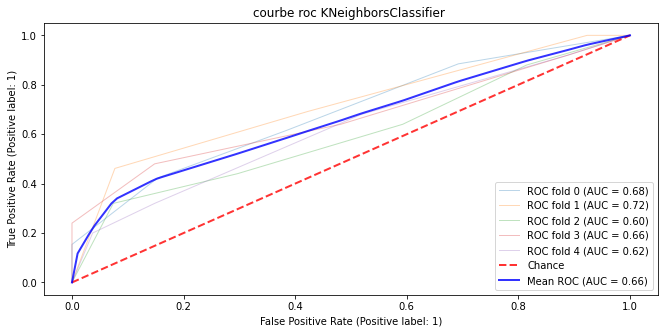

Accuracy: [0.63461538 0.69230769 0.57692308 0.67307692 0.59615385]
moy_accuracy: 0.63
precision: [0.73333333 0.85714286 0.57894737 0.75       0.66666667]
moy_precision: 0.72
sensibilité : [0.42307692 0.46153846 0.44       0.48       0.32      ]
moy_sensibilité: 0.42
spécificité : [0.84615385 0.92307692 0.7037037  0.85185185 0.85185185]
moy_spécificité: 0.84
MCC : [0.29713345 0.43355498 0.1491029  0.35924017 0.20379123]
MCC: 0.29
balanced_accuracy : [0.63461538 0.69230769 0.57185185 0.66592593 0.58592593]
balanced_accuracy: 0.63
roc_auc : [0.68491124 0.71745562 0.59925926 0.66444444 0.62074074]
roc_auc: 0.66
cohen_kappa_scorec : [0.26923077 0.38461538 0.14499253 0.33633634 0.17522659]
cohen_kappa_scorec: 0.26


In [11]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

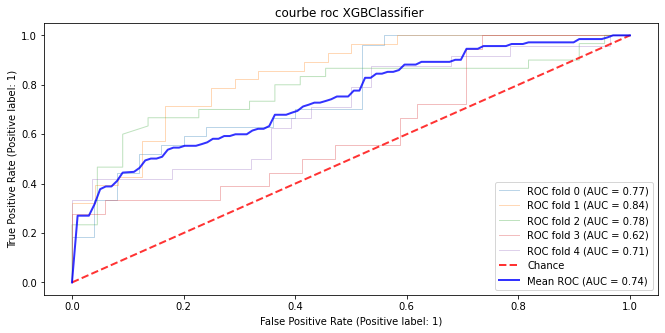

Accuracy: [0.69230769 0.76923077 0.71153846 0.53846154 0.63461538]
moy_accuracy: 0.67
precision: [0.73913043 0.78571429 0.77777778 0.38461538 0.5862069 ]
moy_precision: 0.65
sensibilité : [0.62962963 0.78571429 0.7        0.55555556 0.70833333]
moy_sensibilité: 0.68
spécificité : [0.76       0.75       0.72727273 0.52941176 0.57142857]
moy_spécificité: 0.67
MCC : [0.39195927 0.53571429 0.42249858 0.08084521 0.28080853]
MCC: 0.34
balanced_accuracy : [0.69481481 0.76785714 0.71363636 0.54248366 0.63988095]
balanced_accuracy: 0.67
roc_auc : [0.77037037 0.8422619  0.7780303  0.61601307 0.70982143]
roc_auc: 0.74
cohen_kappa_scorec : [0.38733432 0.53571429 0.41964286 0.07692308 0.27565982]
cohen_kappa_scorec: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

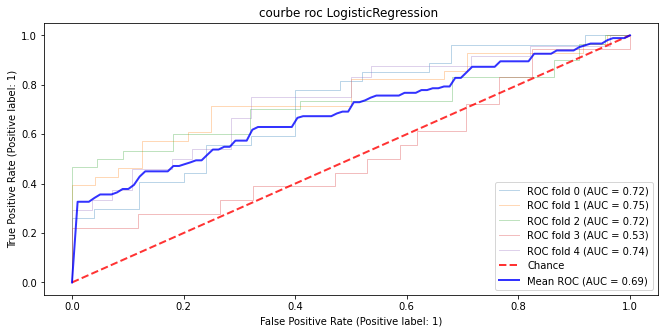

Accuracy: [0.51923077 0.67307692 0.67307692 0.57692308 0.67307692]
moy_accuracy: 0.62
precision: [0.55       0.68965517 0.72413793 0.38888889 0.65217391]
moy_precision: 0.60
sensibilité : [0.40740741 0.71428571 0.7        0.38888889 0.625     ]
moy_sensibilité: 0.57
spécificité : [0.64       0.625      0.63636364 0.67647059 0.71428571]
moy_spécificité: 0.66
MCC : [0.04868645 0.34055503 0.33459395 0.06535948 0.34055503]
MCC: 0.23
balanced_accuracy : [0.5237037  0.66964286 0.66818182 0.53267974 0.66964286]
balanced_accuracy: 0.61
roc_auc : [0.68740741 0.75744048 0.71818182 0.5245098  0.75297619]
roc_auc: 0.69
cohen_kappa_scorec : [0.04692082 0.34029851 0.33433735 0.06535948 0.34029851]
cohen_kappa_scorec: 0.23
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

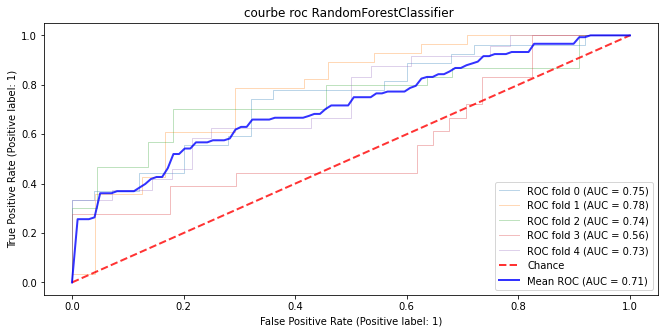

Accuracy: [0.63461538 0.65384615 0.73076923 0.53846154 0.67307692]
moy_accuracy: 0.65
precision: [0.68181818 0.70833333 0.83333333 0.36363636 0.66666667]
moy_precision: 0.65
sensibilité : [0.55555556 0.60714286 0.66666667 0.44444444 0.58333333]
moy_sensibilité: 0.57
spécificité : [0.72       0.70833333 0.81818182 0.58823529 0.75      ]
moy_spécificité: 0.72
MCC : [0.27866928 0.31547619 0.48049998 0.03146895 0.33866701]
MCC: 0.29
balanced_accuracy : [0.63777778 0.6577381  0.74242424 0.51633987 0.66666667]
balanced_accuracy: 0.64
roc_auc : [0.74518519 0.78125    0.74393939 0.56372549 0.73363095]
roc_auc: 0.71
cohen_kappa_scorec : [0.27352941 0.31176471 0.46783626 0.0310559  0.33633634]
cohen_kappa_scorec: 0.28
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

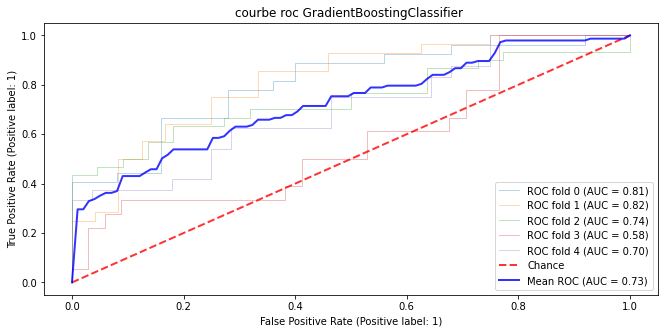

Accuracy: [0.73076923 0.71153846 0.69230769 0.53846154 0.65384615]
moy_accuracy: 0.67
precision: [0.7826087  0.76       0.79166667 0.35       0.63636364]
moy_precision: 0.66
sensibilité : [0.66666667 0.67857143 0.63333333 0.38888889 0.58333333]
moy_sensibilité: 0.59
spécificité : [0.8        0.75       0.77272727 0.61764706 0.71428571]
moy_spécificité: 0.73
MCC : [0.46945693 0.42761799 0.40241873 0.00639137 0.30031249]
MCC: 0.32
balanced_accuracy : [0.73333333 0.71428571 0.7030303  0.50326797 0.64880952]
balanced_accuracy: 0.66
roc_auc : [0.80740741 0.81547619 0.74090909 0.5751634  0.70238095]
roc_auc: 0.73
cohen_kappa_scorec : [0.46391753 0.42477876 0.39181287 0.00636943 0.2994012 ]
cohen_kappa_scorec: 0.32
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

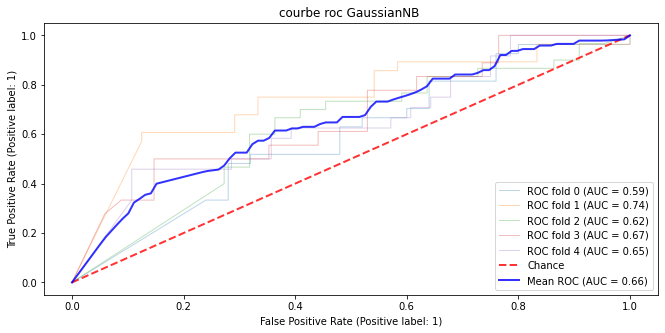

Accuracy: [0.53846154 0.61538462 0.61538462 0.55769231 0.55769231]
moy_accuracy: 0.58
precision: [0.54545455 0.61764706 0.63157895 0.4        0.51724138]
moy_precision: 0.54
sensibilité : [0.66666667 0.75       0.8        0.55555556 0.625     ]
moy_sensibilité: 0.68
spécificité : [0.4        0.45833333 0.36363636 0.55882353 0.5       ]
moy_spécificité: 0.46
MCC : [0.06917145 0.21830701 0.18226193 0.10891067 0.12546764]
MCC: 0.14
balanced_accuracy : [0.53333333 0.60416667 0.58181818 0.55718954 0.5625    ]
balanced_accuracy: 0.57
roc_auc : [0.58962963 0.74107143 0.62348485 0.67075163 0.65029762]
roc_auc: 0.66
cohen_kappa_scorec : [0.06726457 0.21212121 0.17197452 0.10479042 0.12316716]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

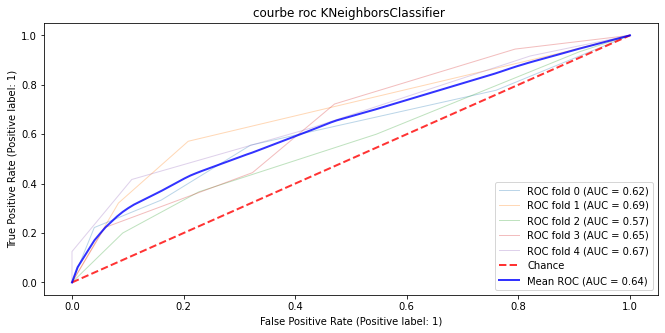

Accuracy: [0.57692308 0.67307692 0.53846154 0.59615385 0.67307692]
moy_accuracy: 0.61
precision: [0.69230769 0.76190476 0.6875     0.42105263 0.76923077]
moy_precision: 0.67
sensibilité : [0.33333333 0.57142857 0.36666667 0.44444444 0.41666667]
moy_sensibilité: 0.43
spécificité : [0.84       0.79166667 0.77272727 0.67647059 0.89285714]
moy_spécificité: 0.79
MCC : [0.2        0.36890513 0.1492123  0.11945993 0.35634832]
MCC: 0.24
balanced_accuracy : [0.58666667 0.68154762 0.56969697 0.56045752 0.6547619 ]
balanced_accuracy: 0.61
roc_auc : [0.61555556 0.68973214 0.56818182 0.6503268  0.6703869 ]
roc_auc: 0.64
cohen_kappa_scorec : [0.16981132 0.35568513 0.12849162 0.11935484 0.32      ]
cohen_kappa_scorec: 0.22


In [10]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Données équilibrées

In [12]:
Cl1 = '/content/cs-longia.xlsx' 
data1= pd.read_excel(Cl1, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [13]:
del data1["Source"] 
del data1["CodeSite"] 
data1

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [14]:
X1 = data1.loc[:, data1.columns != 'Cs_longia']
Y1= data1.Cs_longia

In [15]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [16]:
Y1

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

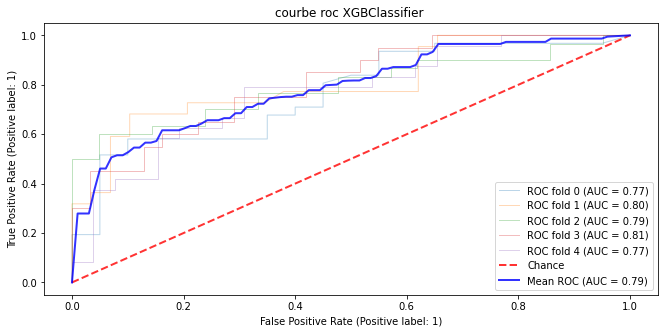

Accuracy: [0.62745098 0.64705882 0.7254902  0.7254902  0.74      ]
moy_accuracy: 0.69
precision: [0.75       0.56666667 0.76666667 0.625      0.7037037 ]
moy_precision: 0.68
sensibilité : [0.58064516 0.77272727 0.76666667 0.75       0.79166667]
moy_sensibilité: 0.73
spécificité : [0.7        0.55172414 0.66666667 0.70967742 0.69230769]
moy_spécificité: 0.66
MCC : [0.27451489 0.32650492 0.43333333 0.44963645 0.48514197]
MCC: 0.39
balanced_accuracy : [0.64032258 0.66222571 0.71666667 0.72983871 0.74198718]
balanced_accuracy: 0.70
roc_auc : [0.76612903 0.80485893 0.79206349 0.80645161 0.76762821]
roc_auc: 0.79
cohen_kappa_scorec : [0.2642369  0.31081081 0.43333333 0.44392523 0.48165869]
cohen_kappa_scorec: 0.39
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

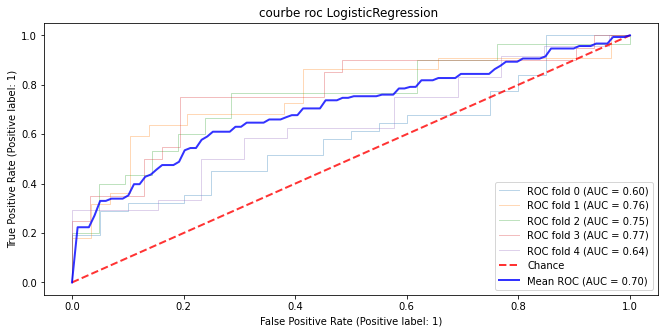

Accuracy: [0.54901961 0.68627451 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.67
precision: [0.66666667 0.59375    0.76666667 0.7        0.65      ]
moy_precision: 0.68
sensibilité : [0.51612903 0.86363636 0.76666667 0.7        0.54166667]
moy_sensibilité: 0.68
spécificité : [0.6        0.55172414 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.67
MCC : [0.11359237 0.4254845  0.43333333 0.50645161 0.27783119]
MCC: 0.35
balanced_accuracy : [0.55806452 0.70768025 0.71666667 0.75322581 0.63621795]
balanced_accuracy: 0.67
roc_auc : [0.58709677 0.77115987 0.74920635 0.76935484 0.6474359 ]
roc_auc: 0.70
cohen_kappa_scorec : [0.10933941 0.39375929 0.43333333 0.50645161 0.27419355]
cohen_kappa_scorec: 0.34
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

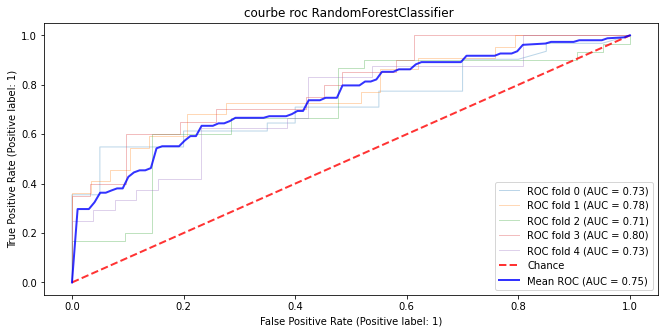

Accuracy: [0.68627451 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.94117647 0.55172414 0.81818182 0.58333333 0.65217391]
moy_precision: 0.71
sensibilité : [0.51612903 0.72727273 0.6        0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.95       0.55172414 0.80952381 0.67741935 0.69230769]
moy_spécificité: 0.74
MCC : [0.48276756 0.27899687 0.40694816 0.36917519 0.31807321]
MCC: 0.37
balanced_accuracy : [0.73306452 0.63949843 0.7047619  0.68870968 0.65865385]
balanced_accuracy: 0.68
roc_auc : [0.72903226 0.77586207 0.71269841 0.7983871  0.72596154]
roc_auc: 0.75
cohen_kappa_scorec : [0.41463415 0.26867925 0.38738739 0.36448598 0.31781701]
cohen_kappa_scorec: 0.35
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

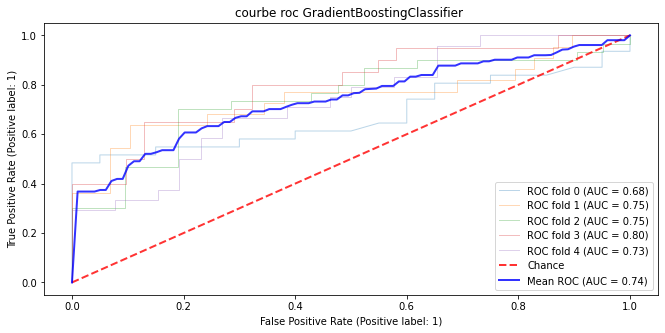

Accuracy: [0.62745098 0.66666667 0.7254902  0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.77272727 0.59259259 0.80769231 0.59090909 0.64      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.72727273 0.7        0.65       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.75       0.62068966 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.29414776 0.34526705 0.45474301 0.3545673  0.32025631]
MCC: 0.35
balanced_accuracy : [0.64919355 0.67398119 0.73095238 0.67983871 0.66025641]
balanced_accuracy: 0.68
roc_auc : [0.67580645 0.7492163  0.74920635 0.8        0.73237179]
roc_auc: 0.74
cohen_kappa_scorec : [0.27632562 0.33867277 0.44907407 0.35340729 0.32      ]
cohen_kappa_scorec: 0.35
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

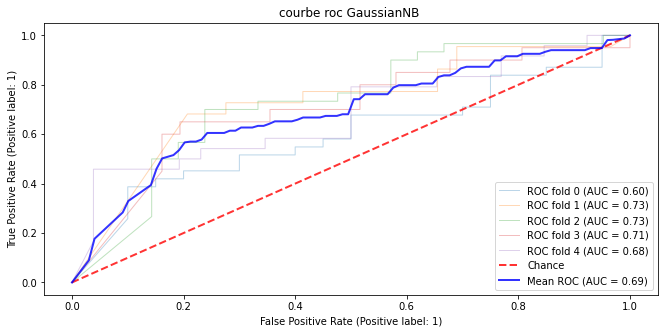

Accuracy: [0.56862745 0.58823529 0.66666667 0.64705882 0.62      ]
moy_accuracy: 0.62
precision: [0.65517241 0.51219512 0.6969697  0.53846154 0.60869565]
moy_precision: 0.60
sensibilité : [0.61290323 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.52380952 0.61290323 0.65384615]
moy_spécificité: 0.52
MCC : [0.11129915 0.33043378 0.29914903 0.30559708 0.23775169]
MCC: 0.26
balanced_accuracy : [0.55645161 0.63244514 0.6452381  0.65645161 0.61858974]
balanced_accuracy: 0.62
roc_auc : [0.5983871  0.73119122 0.72539683 0.70725806 0.68429487]
roc_auc: 0.69
cohen_kappa_scorec : [0.11093502 0.23988644 0.29683698 0.29709035 0.23756019]
cohen_kappa_scorec: 0.24
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

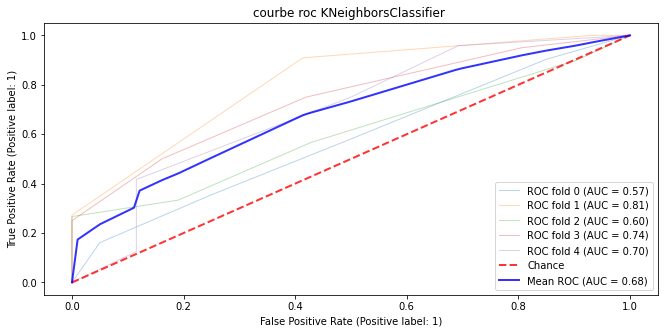

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27
balanced_accuracy : [0.55241935 0.69200627 0.57142857 0.66935484 0.65064103]
balanced_accuracy: 0.63
roc_auc : [0.575      0.80721003 0.60396825 0.73951613 0.69711538]
roc_auc: 0.68
cohen_kappa_scorec : [0.09252669 0.39043825 0.12820513 0.35443038 0.30668842]
cohen_kappa_scorec: 0.25


In [17]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

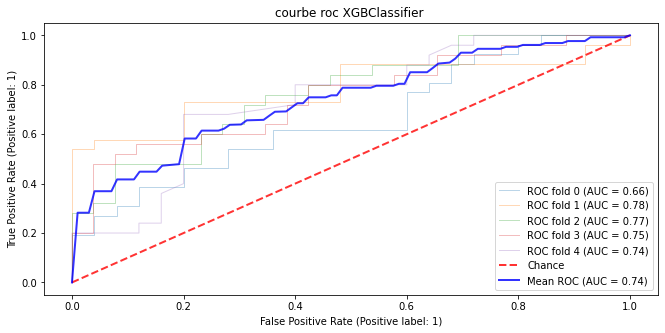

Accuracy: [0.60784314 0.66666667 0.68627451 0.62745098 0.72      ]
moy_accuracy: 0.66
precision: [0.63636364 0.65517241 0.64516129 0.61538462 0.73913043]
moy_precision: 0.66
sensibilité : [0.53846154 0.73076923 0.8        0.64       0.68      ]
moy_sensibilité: 0.68
spécificité : [0.68       0.6        0.57692308 0.61538462 0.76      ]
moy_spécificité: 0.65
MCC : [0.22050646 0.33386542 0.38593446 0.25538462 0.44141479]
MCC: 0.33
balanced_accuracy : [0.60923077 0.66538462 0.68846154 0.62769231 0.72      ]
balanced_accuracy: 0.66
roc_auc : [0.66       0.78461538 0.76923077 0.75230769 0.7384    ]
roc_auc: 0.74
cohen_kappa_scorec : [0.21779141 0.33153431 0.37519142 0.25518832 0.44      ]
cohen_kappa_scorec: 0.32
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

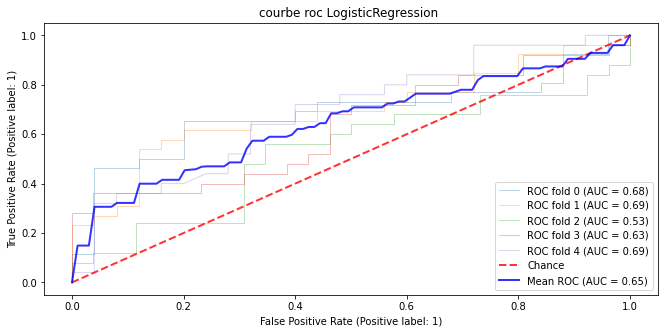

Accuracy: [0.68627451 0.64705882 0.56862745 0.56862745 0.64      ]
moy_accuracy: 0.62
precision: [0.72727273 0.65384615 0.56       0.55555556 0.65217391]
moy_precision: 0.63
sensibilité : [0.61538462 0.65384615 0.56       0.6        0.6       ]
moy_sensibilité: 0.61
spécificité : [0.76       0.64       0.57692308 0.53846154 0.68      ]
moy_spécificité: 0.64
MCC : [0.37889843 0.29384615 0.13692308 0.13867505 0.28090032]
MCC: 0.25
balanced_accuracy : [0.68769231 0.64692308 0.56846154 0.56923077 0.64      ]
balanced_accuracy: 0.62
roc_auc : [0.67846154 0.69384615 0.54153846 0.65230769 0.6952    ]
roc_auc: 0.65
cohen_kappa_scorec : [0.37423313 0.29384615 0.13692308 0.13824885 0.28      ]
cohen_kappa_scorec: 0.24
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

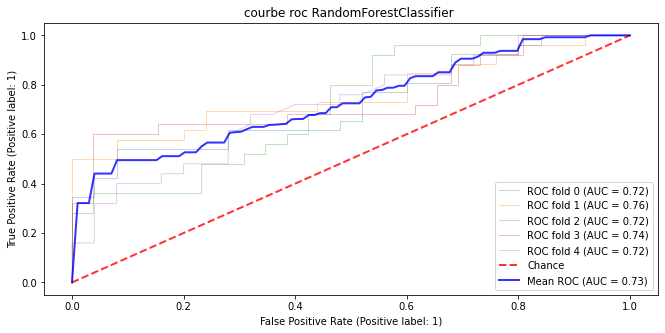

Accuracy: [0.60784314 0.70588235 0.60784314 0.70588235 0.64      ]
moy_accuracy: 0.65
precision: [0.61538462 0.73913043 0.61904762 0.72727273 0.70588235]
moy_precision: 0.68
sensibilité : [0.61538462 0.65384615 0.52       0.64       0.48      ]
moy_sensibilité: 0.58
spécificité : [0.6        0.76       0.69230769 0.76923077 0.8       ]
moy_spécificité: 0.72
MCC : [0.21538462 0.41576954 0.21565133 0.41306141 0.29554023]
MCC: 0.31
balanced_accuracy : [0.60769231 0.70692308 0.60615385 0.70461538 0.64      ]
balanced_accuracy: 0.65
roc_auc : [0.72307692 0.76       0.72153846 0.74153846 0.716     ]
roc_auc: 0.73
cohen_kappa_scorec : [0.21538462 0.41289332 0.21296296 0.41017733 0.28      ]
cohen_kappa_scorec: 0.31
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

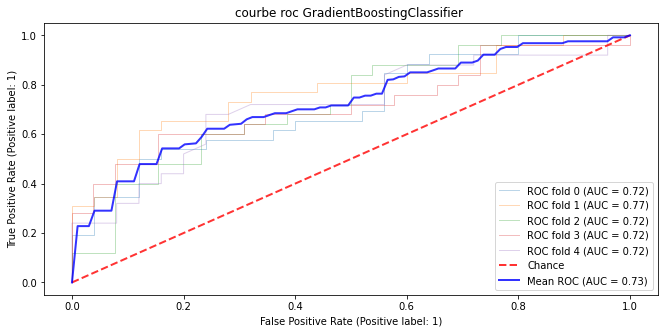

Accuracy: [0.62745098 0.70588235 0.64705882 0.66666667 0.66      ]
moy_accuracy: 0.66
precision: [0.64       0.72       0.62962963 0.68181818 0.7       ]
moy_precision: 0.67
sensibilité : [0.61538462 0.69230769 0.68       0.6        0.56      ]
moy_sensibilité: 0.63
spécificité : [0.64       0.72       0.61538462 0.73076923 0.76      ]
moy_spécificité: 0.69
MCC : [0.25538462 0.41230769 0.2958401  0.33386542 0.32659863]
MCC: 0.32
balanced_accuracy : [0.62769231 0.70615385 0.64769231 0.66538462 0.66      ]
balanced_accuracy: 0.66
roc_auc : [0.71538462 0.77076923 0.72461538 0.72       0.716     ]
roc_auc: 0.73
cohen_kappa_scorec : [0.25518832 0.41199078 0.29493088 0.33153431 0.32      ]
cohen_kappa_scorec: 0.32
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

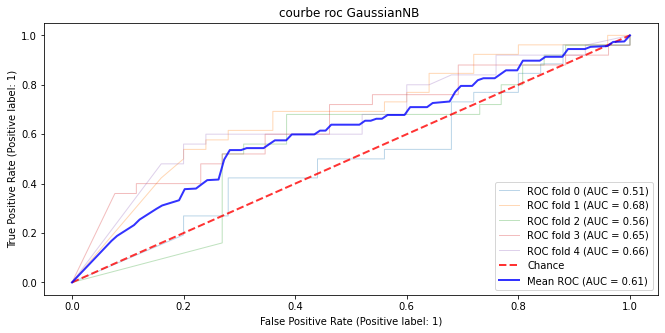

Accuracy: [0.49019608 0.60784314 0.62745098 0.60784314 0.54      ]
moy_accuracy: 0.57
precision: [0.5        0.6        0.61538462 0.60869565 0.525     ]
moy_precision: 0.57
sensibilité : [0.53846154 0.69230769 0.64       0.56       0.84      ]
moy_sensibilité: 0.65
spécificité : [0.44       0.52       0.61538462 0.65384615 0.24      ]
moy_spécificité: 0.49
MCC : [-0.02163856  0.21565133  0.25538462  0.21484002  0.1       ]
MCC: 0.15
balanced_accuracy : [0.48923077 0.60615385 0.62769231 0.60692308 0.54      ]
balanced_accuracy: 0.57
roc_auc : [0.50846154 0.68       0.55846154 0.65076923 0.66      ]
roc_auc: 0.61
cohen_kappa_scorec : [-0.02157165  0.21296296  0.25518832  0.21417565  0.08      ]
cohen_kappa_scorec: 0.15
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

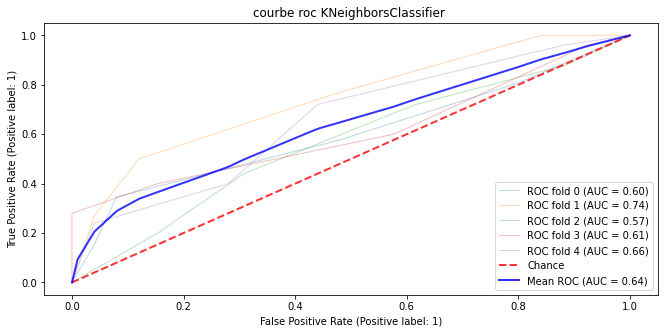

Accuracy: [0.62745098 0.68627451 0.56862745 0.62745098 0.56      ]
moy_accuracy: 0.61
precision: [0.81818182 0.8125     0.57894737 0.71428571 0.58823529]
moy_precision: 0.70
sensibilité : [0.34615385 0.5        0.44       0.4        0.4       ]
moy_sensibilité: 0.42
spécificité : [0.92       0.88       0.69230769 0.84615385 0.72      ]
moy_spécificité: 0.81
MCC : [0.32349166 0.40939851 0.13680122 0.27573914 0.1266601 ]
MCC: 0.25
balanced_accuracy : [0.63307692 0.69       0.56615385 0.62307692 0.56      ]
balanced_accuracy: 0.61
roc_auc : [0.6        0.74307692 0.56692308 0.60923077 0.6584    ]
roc_auc: 0.64
cohen_kappa_scorec : [0.26311787 0.37709924 0.13292117 0.24825446 0.12      ]
cohen_kappa_scorec: 0.23


In [18]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

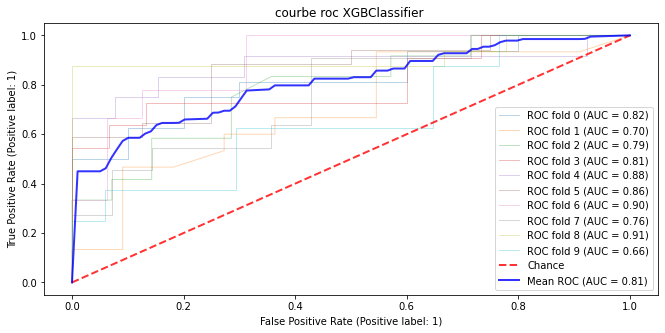

Accuracy: [0.73076923 0.65384615 0.65384615 0.57692308 0.8        0.72
 0.76       0.64       0.92       0.68      ]
moy_accuracy: 0.71
precision: [0.90909091 0.71428571 0.58823529 0.5        0.73333333 0.91666667
 0.63636364 0.58333333 1.         0.5       ]
moy_precision: 0.71
sensibilité : [0.625      0.66666667 0.83333333 0.72727273 0.91666667 0.64705882
 0.77777778 0.63636364 0.875      0.625     ]
moy_sensibilité: 0.73
spécificité : [0.9        0.63636364 0.5        0.46666667 0.69230769 0.875
 0.75       0.64285714 1.         0.70588235]
moy_spécificité: 0.72
MCC : [0.51698426 0.30031249 0.34929122 0.19694639 0.62103443 0.48744609
 0.51035454 0.27742513 0.84611411 0.31506302]
MCC: 0.44
balanced_accuracy : [0.7625     0.65151515 0.66666667 0.5969697  0.80448718 0.76102941
 0.76388889 0.63961039 0.9375     0.66544118]
balanced_accuracy: 0.72
roc_auc : [0.81875    0.7030303  0.78869048 0.80606061 0.87820513 0.86029412
 0.89583333 0.75974026 0.90972222 0.66176471]
roc_auc: 0.81
cohe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

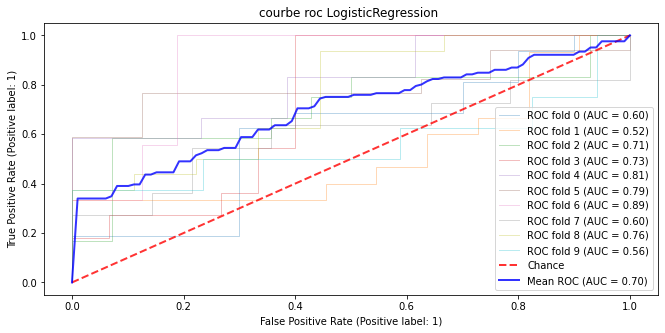

Accuracy: [0.53846154 0.5        0.61538462 0.69230769 0.68       0.72
 0.76       0.68       0.52       0.6       ]
moy_accuracy: 0.63
precision: [0.7        0.57142857 0.5625     0.58823529 0.625      0.91666667
 0.66666667 0.66666667 0.75       0.4       ]
moy_precision: 0.64
sensibilité : [0.4375     0.53333333 0.75       0.90909091 0.83333333 0.64705882
 0.66666667 0.54545455 0.375      0.5       ]
moy_sensibilité: 0.62
spécificité : [0.7        0.45454545 0.5        0.53333333 0.53846154 0.875
 0.8125     0.78571429 0.77777778 0.64705882]
moy_spécificité: 0.66
MCC : [ 0.1375     -0.0120125   0.25617377  0.45944674  0.38697637  0.48744609
  0.47916667  0.34247476  0.15720704  0.14002801]
MCC: 0.28
balanced_accuracy : [0.56875    0.49393939 0.625      0.72121212 0.68589744 0.76102941
 0.73958333 0.66558442 0.57638889 0.57352941]
balanced_accuracy: 0.64
roc_auc : [0.575      0.55757576 0.73214286 0.72727273 0.81410256 0.80882353
 0.89583333 0.61038961 0.73611111 0.55147059]
roc_auc:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

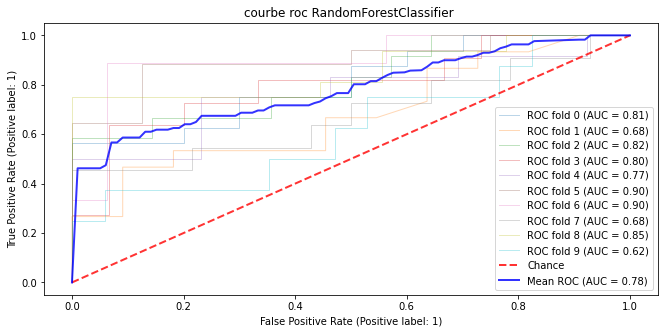

Accuracy: [0.69230769 0.65384615 0.65384615 0.69230769 0.68       0.72
 0.8        0.64       0.8        0.6       ]
moy_accuracy: 0.69
precision: [0.9        0.8        0.6        0.6        0.64285714 1.
 0.66666667 0.6        1.         0.375     ]
moy_precision: 0.72
sensibilité : [0.5625     0.53333333 0.75       0.81818182 0.75       0.58823529
 0.88888889 0.54545455 0.6875     0.375     ]
moy_sensibilité: 0.65
spécificité : [0.9        0.81818182 0.57142857 0.6        0.61538462 1.
 0.75       0.71428571 1.         0.70588235]
moy_spécificité: 0.77
MCC : [0.4625     0.35696532 0.32433749 0.41818182 0.36774959 0.56011203
 0.61382459 0.26318068 0.66480395 0.08088235]
MCC: 0.41
balanced_accuracy : [0.73125    0.67575758 0.66071429 0.70909091 0.68269231 0.79411765
 0.81944444 0.62987013 0.84375    0.54044118]
balanced_accuracy: 0.71
roc_auc : [0.80625    0.67878788 0.81547619 0.8        0.76923077 0.89705882
 0.90277778 0.68181818 0.85416667 0.625     ]
roc_auc: 0.78
cohen_kappa_sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

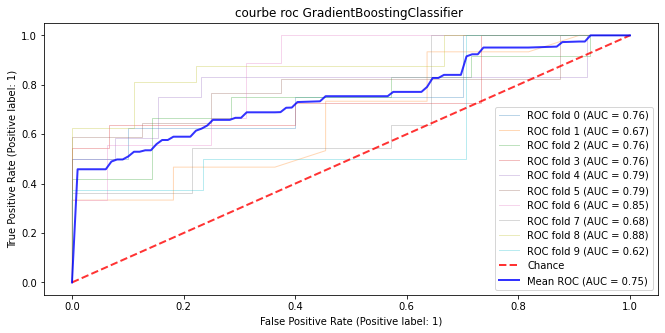

Accuracy: [0.73076923 0.53846154 0.73076923 0.61538462 0.68       0.68
 0.68       0.64       0.8        0.6       ]
moy_accuracy: 0.67
precision: [0.90909091 0.61538462 0.72727273 0.53846154 0.625      0.90909091
 0.54545455 0.6        0.92307692 0.4       ]
moy_precision: 0.68
sensibilité : [0.625      0.53333333 0.66666667 0.63636364 0.83333333 0.58823529
 0.66666667 0.54545455 0.75       0.5       ]
moy_sensibilité: 0.63
spécificité : [0.9        0.54545455 0.78571429 0.6        0.53846154 0.875
 0.6875     0.71428571 0.88888889 0.64705882]
moy_spécificité: 0.72
MCC : [0.51698426 0.07784989 0.45647498 0.23354968 0.38697637 0.43532212
 0.34247476 0.26318068 0.61382459 0.14002801]
MCC: 0.35
balanced_accuracy : [0.7625     0.53939394 0.72619048 0.61818182 0.68589744 0.73161765
 0.67708333 0.62987013 0.81944444 0.57352941]
balanced_accuracy: 0.68
roc_auc : [0.7625     0.67272727 0.75595238 0.75757576 0.79487179 0.78676471
 0.84722222 0.67532468 0.88194444 0.61764706]
roc_auc: 0.76
cohe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

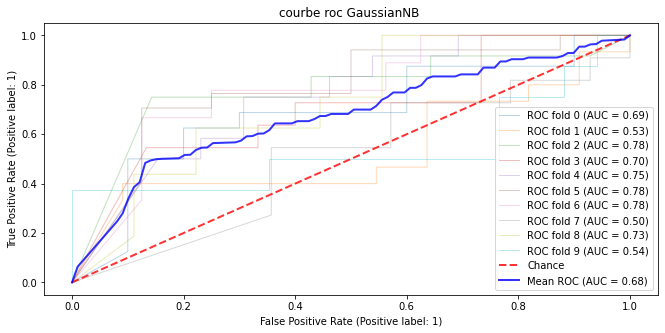

Accuracy: [0.69230769 0.53846154 0.61538462 0.53846154 0.64       0.76
 0.64       0.48       0.6        0.52      ]
moy_accuracy: 0.60
precision: [0.83333333 0.58823529 0.55       0.47058824 0.6        0.86666667
 0.5        0.42857143 0.71428571 0.33333333]
moy_precision: 0.59
sensibilité : [0.625      0.66666667 0.91666667 0.72727273 0.75       0.76470588
 0.77777778 0.54545455 0.625      0.5       ]
moy_sensibilité: 0.69
spécificité : [0.8        0.36363636 0.35714286 0.4        0.53846154 0.75
 0.5625     0.42857143 0.55555556 0.52941176]
moy_spécificité: 0.53
MCC : [ 0.41475753  0.03146895  0.3239758   0.13216961  0.2941742   0.49009803
  0.32904438 -0.02597403  0.17459498  0.02746175]
MCC: 0.22
balanced_accuracy : [0.7125     0.51515152 0.63690476 0.56363636 0.64423077 0.75735294
 0.67013889 0.48701299 0.59027778 0.51470588]
balanced_accuracy: 0.61
roc_auc : [0.6875     0.53030303 0.77678571 0.6969697  0.75       0.78308824
 0.77777778 0.50324675 0.72569444 0.53676471]
roc_auc: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

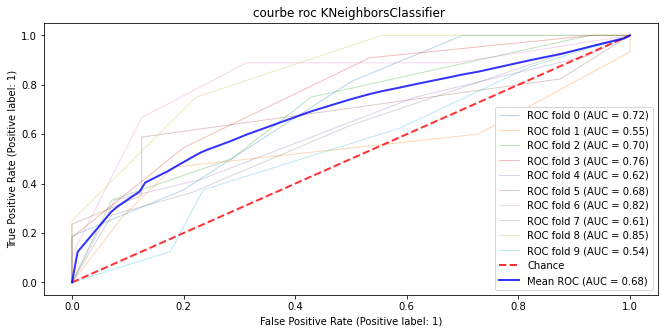

Accuracy: [0.53846154 0.61538462 0.61538462 0.69230769 0.6        0.52
 0.8        0.6        0.52       0.64      ]
moy_accuracy: 0.61
precision: [0.75       0.77777778 0.6        0.66666667 0.625      0.85714286
 0.75       0.57142857 1.         0.42857143]
moy_precision: 0.70
sensibilité : [0.375      0.46666667 0.5        0.54545455 0.41666667 0.35294118
 0.66666667 0.36363636 0.25       0.375     ]
moy_sensibilité: 0.43
spécificité : [0.8        0.81818182 0.71428571 0.8        0.76923077 0.875
 0.875      0.78571429 1.         0.76470588]
moy_spécificité: 0.82
MCC : [0.1844662  0.29580817 0.21957752 0.35874608 0.1990977  0.23681378
 0.5573704  0.16511336 0.32732684 0.14514393]
MCC: 0.27
balanced_accuracy : [0.5875     0.64242424 0.60714286 0.67272727 0.59294872 0.61397059
 0.77083333 0.57467532 0.625      0.56985294]
balanced_accuracy: 0.63
roc_auc : [0.715625   0.54545455 0.69940476 0.76363636 0.625      0.68014706
 0.82291667 0.61038961 0.84722222 0.54411765]
roc_auc: 0.69
cohe

In [19]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

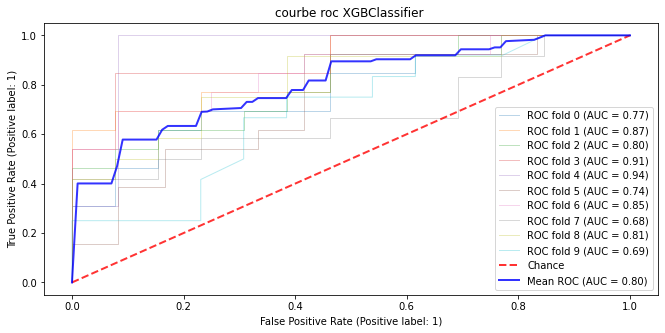

Accuracy: [0.73076923 0.69230769 0.65384615 0.80769231 0.92       0.6
 0.72       0.6        0.68       0.6       ]
moy_accuracy: 0.70
precision: [0.75       0.66666667 0.64285714 0.9        0.86666667 0.63636364
 0.75       0.58333333 0.64285714 0.6       ]
moy_precision: 0.70
sensibilité : [0.69230769 0.76923077 0.69230769 0.69230769 1.         0.53846154
 0.69230769 0.58333333 0.75       0.5       ]
moy_sensibilité: 0.69
spécificité : [0.76923077 0.61538462 0.61538462 0.92307692 0.83333333 0.66666667
 0.75       0.61538462 0.61538462 0.69230769]
moy_spécificité: 0.71
MCC : [0.46291005 0.38924947 0.3086067  0.63245553 0.84983659 0.20645591
 0.44230769 0.19871795 0.36774959 0.19611614]
MCC: 0.41
balanced_accuracy : [0.73076923 0.69230769 0.65384615 0.80769231 0.91666667 0.6025641
 0.72115385 0.59935897 0.68269231 0.59615385]
balanced_accuracy: 0.70
roc_auc : [0.76923077 0.86982249 0.80473373 0.90532544 0.94230769 0.73717949
 0.8525641  0.67948718 0.81410256 0.69230769]
roc_auc: 0.81
c

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

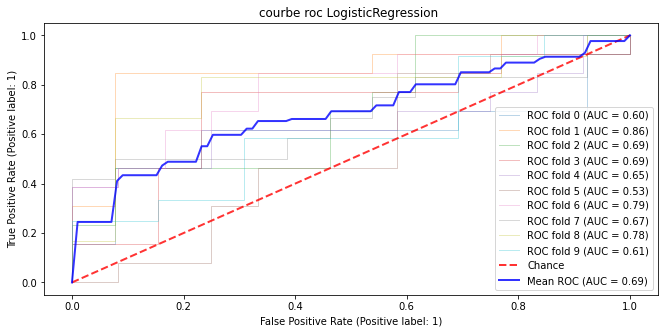

Accuracy: [0.65384615 0.76923077 0.61538462 0.76923077 0.56       0.52
 0.68       0.6        0.72       0.6       ]
moy_accuracy: 0.65
precision: [0.7        0.73333333 0.66666667 0.76923077 0.57142857 0.53846154
 0.69230769 0.58333333 0.66666667 0.6       ]
moy_precision: 0.65
sensibilité : [0.53846154 0.84615385 0.46153846 0.76923077 0.61538462 0.53846154
 0.69230769 0.58333333 0.83333333 0.5       ]
moy_sensibilité: 0.64
spécificité : [0.76923077 0.69230769 0.76923077 0.76923077 0.5        0.5
 0.66666667 0.61538462 0.61538462 0.69230769]
moy_spécificité: 0.66
MCC : [0.31622777 0.54494926 0.24253563 0.53846154 0.11613145 0.03846154
 0.35897436 0.19871795 0.45760432 0.19611614]
MCC: 0.30
balanced_accuracy : [0.65384615 0.76923077 0.61538462 0.76923077 0.55769231 0.51923077
 0.67948718 0.59935897 0.72435897 0.59615385]
balanced_accuracy: 0.65
roc_auc : [0.59171598 0.85207101 0.68639053 0.71005917 0.6474359  0.51923077
 0.77564103 0.67307692 0.78205128 0.6025641 ]
roc_auc: 0.68
cohen_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

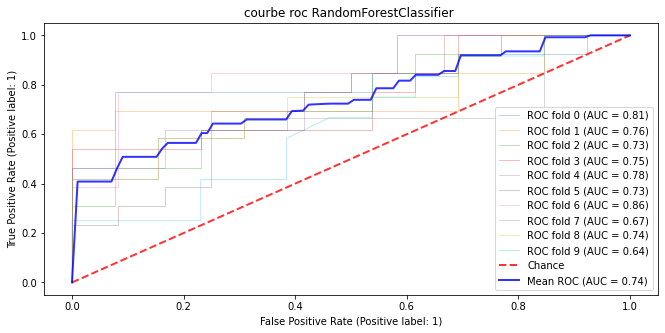

Accuracy: [0.76923077 0.76923077 0.65384615 0.69230769 0.64       0.56
 0.84       0.68       0.68       0.56      ]
moy_accuracy: 0.68
precision: [0.76923077 0.81818182 0.66666667 0.77777778 0.625      0.625
 0.90909091 0.66666667 0.7        0.57142857]
moy_precision: 0.71
sensibilité : [0.76923077 0.69230769 0.61538462 0.53846154 0.76923077 0.38461538
 0.76923077 0.66666667 0.58333333 0.33333333]
moy_sensibilité: 0.61
spécificité : [0.76923077 0.84615385 0.69230769 0.84615385 0.5        0.75
 0.91666667 0.69230769 0.76923077 0.76923077]
moy_spécificité: 0.76
MCC : [0.53846154 0.54494926 0.3086067  0.40422604 0.28022427 0.1441742
 0.69033695 0.35897436 0.35954625 0.1141228 ]
MCC: 0.37
balanced_accuracy : [0.76923077 0.76923077 0.65384615 0.69230769 0.63461538 0.56730769
 0.84294872 0.67948718 0.67628205 0.55128205]
balanced_accuracy: 0.68
roc_auc : [0.81065089 0.75739645 0.73372781 0.74556213 0.78205128 0.73076923
 0.85897436 0.66666667 0.73717949 0.63782051]
roc_auc: 0.75
cohen_kappa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

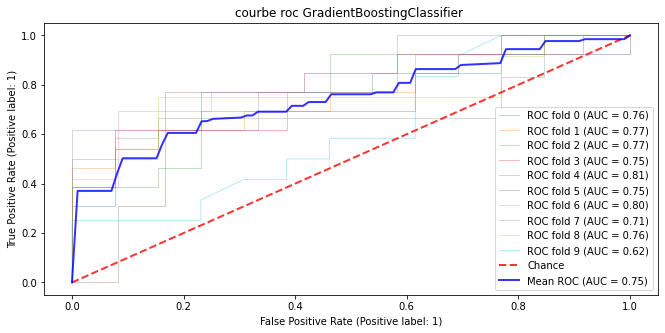

Accuracy: [0.69230769 0.65384615 0.69230769 0.61538462 0.64       0.72
 0.76       0.72       0.76       0.56      ]
moy_accuracy: 0.68
precision: [0.77777778 0.64285714 0.69230769 0.61538462 0.625      0.8
 0.76923077 0.72727273 0.75       0.55555556]
moy_precision: 0.70
sensibilité : [0.53846154 0.69230769 0.69230769 0.61538462 0.76923077 0.61538462
 0.76923077 0.66666667 0.75       0.41666667]
moy_sensibilité: 0.65
spécificité : [0.84615385 0.61538462 0.69230769 0.61538462 0.5        0.83333333
 0.75       0.76923077 0.76923077 0.69230769]
moy_spécificité: 0.71
MCC : [0.40422604 0.3086067  0.38461538 0.23076923 0.28022427 0.45760432
 0.51923077 0.43871881 0.51923077 0.11342411]
MCC: 0.37
balanced_accuracy : [0.69230769 0.65384615 0.69230769 0.61538462 0.63461538 0.72435897
 0.75961538 0.71794872 0.75961538 0.55448718]
balanced_accuracy: 0.68
roc_auc : [0.75739645 0.76923077 0.76923077 0.74556213 0.81410256 0.75
 0.80128205 0.71153846 0.75641026 0.61538462]
roc_auc: 0.75
cohen_kappa_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

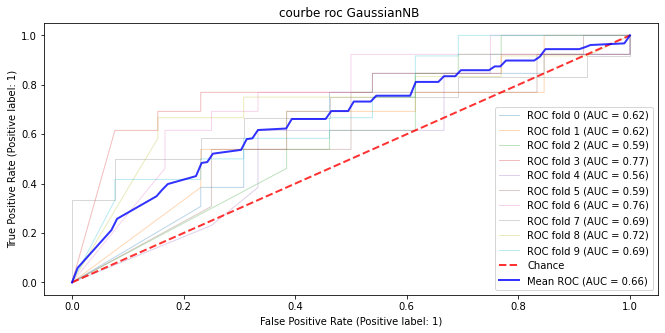

Accuracy: [0.61538462 0.53846154 0.53846154 0.61538462 0.52       0.56
 0.68       0.64       0.52       0.6       ]
moy_accuracy: 0.58
precision: [0.61538462 0.52941176 0.53333333 0.57894737 0.53333333 0.55555556
 0.69230769 0.63636364 0.5        0.57142857]
moy_precision: 0.57
sensibilité : [0.61538462 0.69230769 0.61538462 0.84615385 0.61538462 0.76923077
 0.69230769 0.58333333 0.83333333 0.66666667]
moy_sensibilité: 0.69
spécificité : [0.61538462 0.38461538 0.46153846 0.38461538 0.41666667 0.33333333
 0.66666667 0.69230769 0.23076923 0.53846154]
moy_spécificité: 0.47
MCC : [0.23076923 0.08084521 0.07784989 0.26013299 0.03268602 0.1141228
 0.35897436 0.27742513 0.08006408 0.20645591]
MCC: 0.17
balanced_accuracy : [0.61538462 0.53846154 0.53846154 0.61538462 0.51602564 0.55128205
 0.67948718 0.63782051 0.53205128 0.6025641 ]
balanced_accuracy: 0.58
roc_auc : [0.62130178 0.6183432  0.59171598 0.76923077 0.56089744 0.58974359
 0.75641026 0.68589744 0.72115385 0.69230769]
roc_auc: 0.66


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

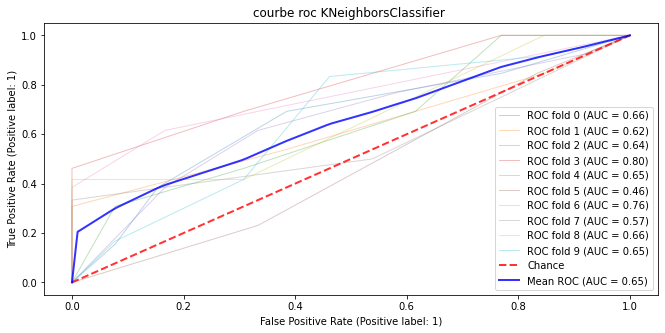

Accuracy: [0.61538462 0.65384615 0.57692308 0.73076923 0.64       0.44
 0.72       0.68       0.56       0.56      ]
moy_accuracy: 0.62
precision: [0.71428571 1.         0.6        1.         0.66666667 0.42857143
 0.8        1.         0.55555556 0.55555556]
moy_precision: 0.73
sensibilité : [0.38461538 0.30769231 0.46153846 0.46153846 0.61538462 0.23076923
 0.61538462 0.33333333 0.41666667 0.41666667]
moy_sensibilité: 0.42
spécificité : [0.84615385 1.         0.69230769 1.         0.66666667 0.66666667
 0.83333333 1.         0.69230769 0.69230769]
moy_spécificité: 0.81
MCC : [ 0.26013299  0.42640143  0.15811388  0.54772256  0.28205128 -0.1141228
  0.45760432  0.45425676  0.11342411  0.11342411]
MCC: 0.27
balanced_accuracy : [0.61538462 0.65384615 0.57692308 0.73076923 0.64102564 0.44871795
 0.72435897 0.66666667 0.55448718 0.55448718]
balanced_accuracy: 0.62
roc_auc : [0.65976331 0.62426036 0.63905325 0.79881657 0.65064103 0.46153846
 0.75641026 0.57051282 0.66346154 0.65384615]
roc_

In [20]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))